In [1]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
sys.path.append("../")

In [3]:
from lib import lightcurve as lc
from lib import functions as func
from lib import plotting

In [4]:
sources_dir = [f.path for f in os.scandir("../data/HBL/") if f.is_dir()]
sources_dir.sort()
sources_dir = np.array(sources_dir)
sources_names = np.array([s.split("/")[-1] for s in sources_dir], dtype="S16")

In [5]:
sources_names

array([b'1ES0229+200', b'3FGLJ0627.9-1517', b'3FGLJ1258.4+2123',
       b'4FGLJ0224.2+1616', b'4FGLJ0344.4+3432', b'4FGLJ0854.0+2753',
       b'4FGLJ0946.2+0104', b'4FGLJ1124.0+2045', b'4FGLJ1124.9+2143',
       b'4FGLJ1258.7-0452', b'4FGLJ1300.0+1753', b'4FGLJ1359.1-1152',
       b'4FGLJ1439.5-2525', b'4FGLJ1447.0-2657', b'4FGLJ1528.4+2004',
       b'4FGLJ1554.2+2008', b'4FGLJ1808.8+3522', b'4FGLJ2030.5+2235',
       b'4FGLJ2133.1+2529', b'4FGLJ2223.3+0102', b'4FGLJ2326.2+0113',
       b'B21320+32', b'GB6J0239+1327', b'GB6J0244+1320', b'GB6J1231+1421',
       b'LEDA32311681', b'MG2J180813+3501', b'PKS0336-177',
       b'PMNJ0525-2010', b'PMNJ1439-2341', b'PMNJ2358-2853', b'RBS0958',
       b'RXJ1533.1+1854', b'RXJ2030.8+1935', b'TXS0100+151',
       b'TXS1312+240'], dtype='|S16')

In [6]:
nu_t = np.sort(np.genfromtxt("../data/HBL/hbl_names_mjd.txt", dtype=[("name","S16"), ("time",np.float)]), order="name")

In [7]:
#m = np.array([n in sources_names for n in nu_t["name"]])

In [8]:
#nu_t = nu_t[m]

In [9]:
#o = np.array([n in nu_t["name"] for n in sources_names])

In [10]:
#sources_dir = sources_dir[o]
#sources_names = sources_names[o]

In [11]:
for i, (n, s) in enumerate(zip(nu_t, sources_names)):
    name = n["name"]
    print(f"{i+1}) {n} -- {s} -- {name==s}")

1) (b'1ES0229+200', 55911.28) -- b'1ES0229+200' -- True
2) (b'3FGLJ0627.9-1517', 57833.31) -- b'3FGLJ0627.9-1517' -- True
3) (b'3FGLJ1258.4+2123', 57312.7) -- b'3FGLJ1258.4+2123' -- True
4) (b'4FGLJ0224.2+1616', 55911.28) -- b'4FGLJ0224.2+1616' -- True
5) (b'4FGLJ0344.4+3432', 57265.22) -- b'4FGLJ0344.4+3432' -- True
6) (b'4FGLJ0854.0+2753', 57269.8) -- b'4FGLJ0854.0+2753' -- True
7) (b'4FGLJ0946.2+0104', 58714.) -- b'4FGLJ0946.2+0104' -- True
8) (b'4FGLJ1124.0+2045', 56390.19) -- b'4FGLJ1124.0+2045' -- True
9) (b'4FGLJ1124.9+2143', 56390.19) -- b'4FGLJ1124.9+2143' -- True
10) (b'4FGLJ1258.7-0452', 57291.9) -- b'4FGLJ1258.7-0452' -- True
11) (b'4FGLJ1300.0+1753', 57312.7) -- b'4FGLJ1300.0+1753' -- True
12) (b'4FGLJ1359.1-1152', 55949.57) -- b'4FGLJ1359.1-1152' -- True
13) (b'4FGLJ1439.5-2525', 57879.53) -- b'4FGLJ1439.5-2525' -- True
14) (b'4FGLJ1447.0-2657', 57879.53) -- b'4FGLJ1447.0-2657' -- True
15) (b'4FGLJ1528.4+2004', 55702.77) -- b'4FGLJ1528.4+2004' -- True
16) (b'4FGLJ1554.2+2

In [12]:
lightcurves = []

for i, s in enumerate(sources_dir):
    lc_bins = np.genfromtxt(s+'/time.txt')
    lc_bins = np.append(lc_bins, lc_bins[-1]+3.5)
    lc_state = np.genfromtxt([f for f in glob.glob(s+"/flux*.txt")][0])
    lc_ts = np.genfromtxt([f for f in glob.glob(s+"/ts*.txt")][0])
    lc_err = np.genfromtxt([f for f in glob.glob(s+"/err_flux*.txt")][0])
    
    not_nan = lc_state[~np.isnan(lc_state)]
    low_state_thr = np.percentile(not_nan,50)
    mean_low_state = np.mean(not_nan[not_nan < low_state_thr])
    std_low_state = np.std(not_nan[not_nan < low_state_thr])
    lc_state[np.isnan(lc_state)] = mean_low_state
    lc_err[np.isnan(lc_state)] = std_low_state
    
    #thr = mean_low_state + 3*std_low_state
    thr = 9.0
    
    lightcurves.append(lc.LightCurve(lc_bins, lc_state, lc_err, lc_ts, thr, sources_names[i]))
    
lightcurves = np.array(lightcurves)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


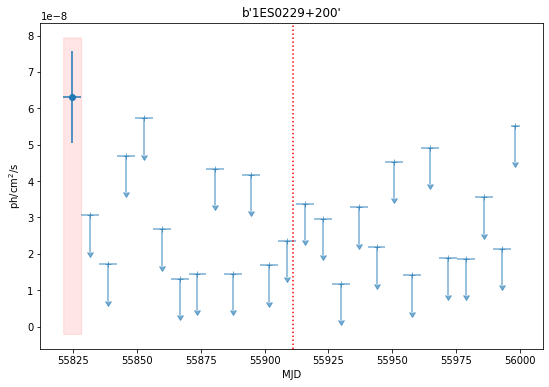

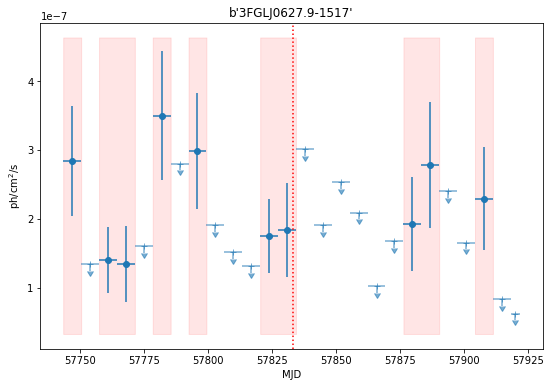

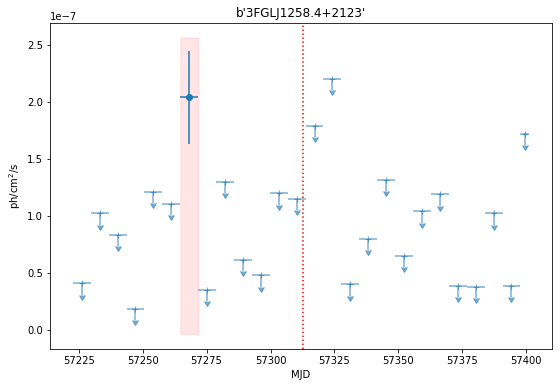

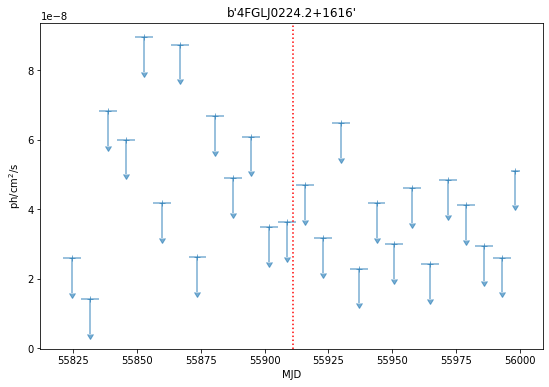

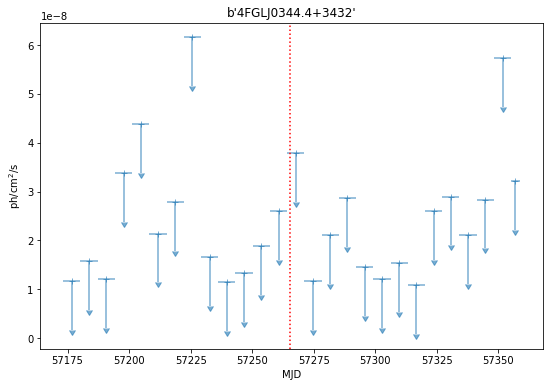

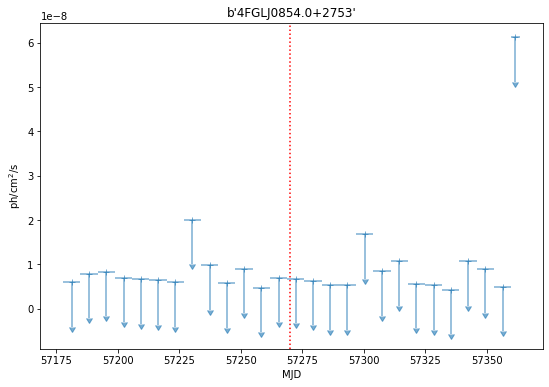

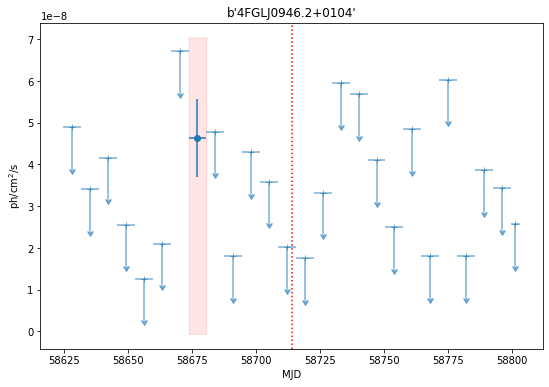

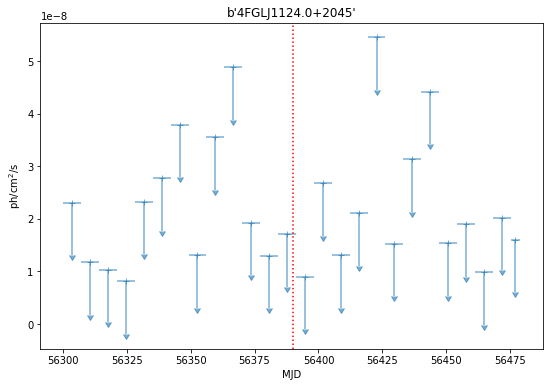

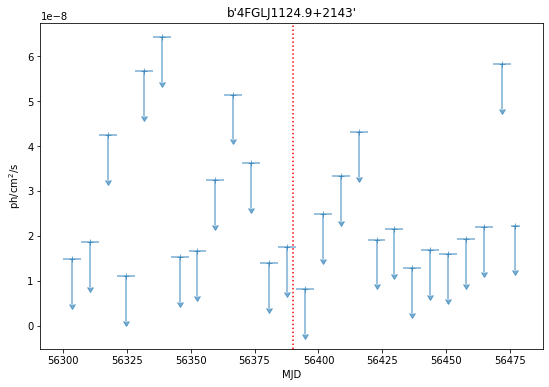

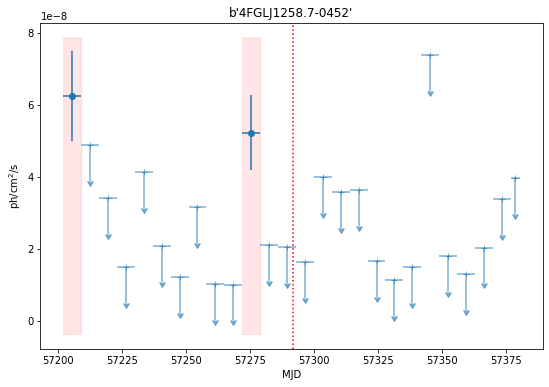

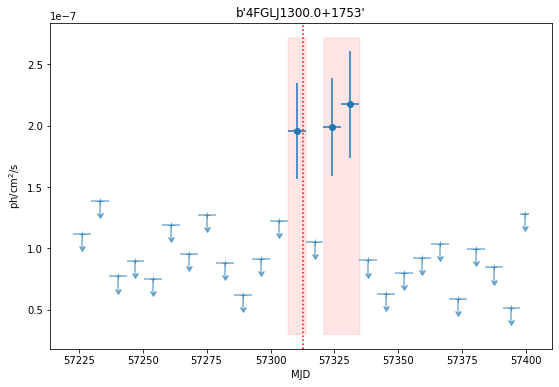

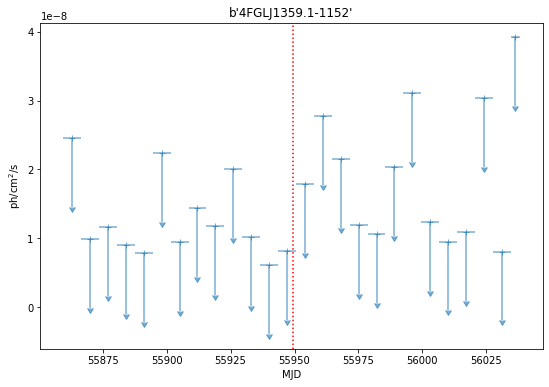

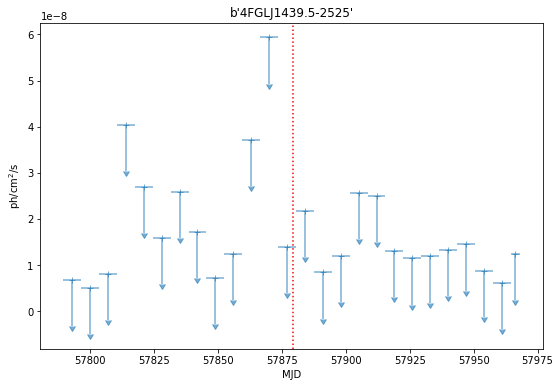

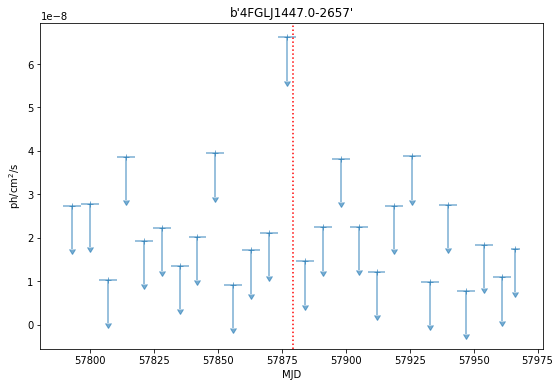

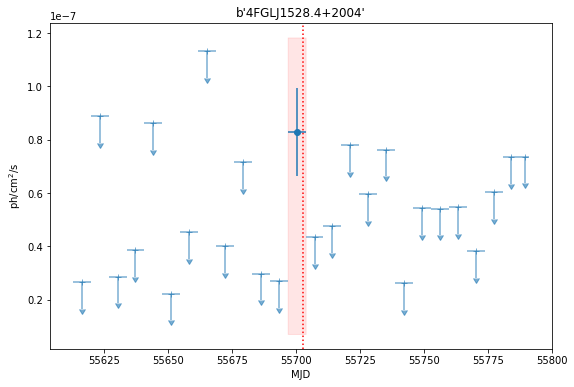

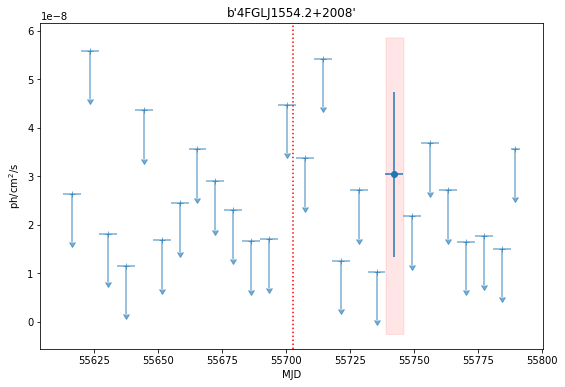

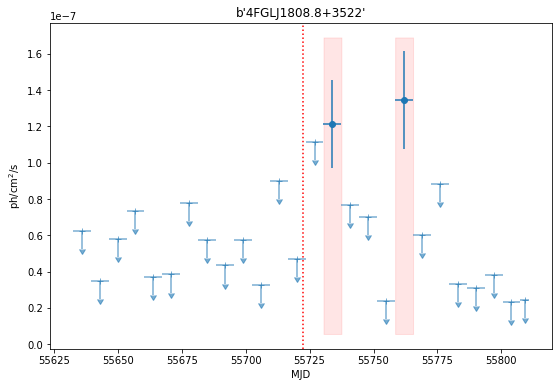

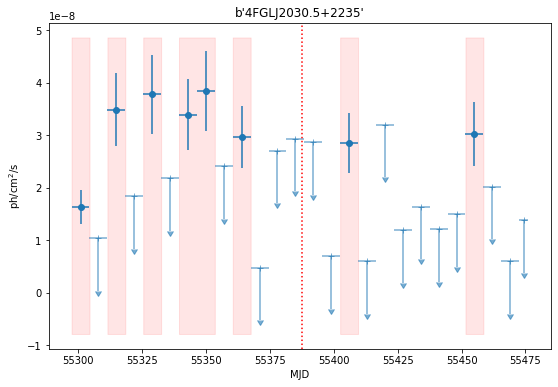

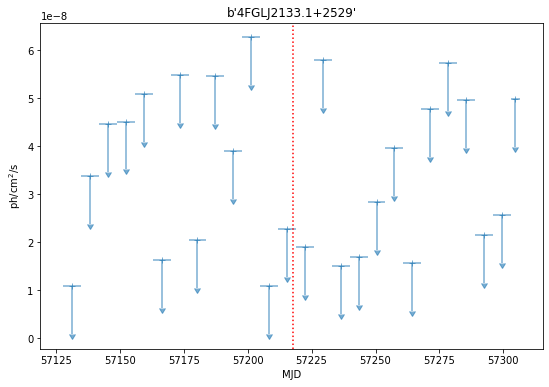

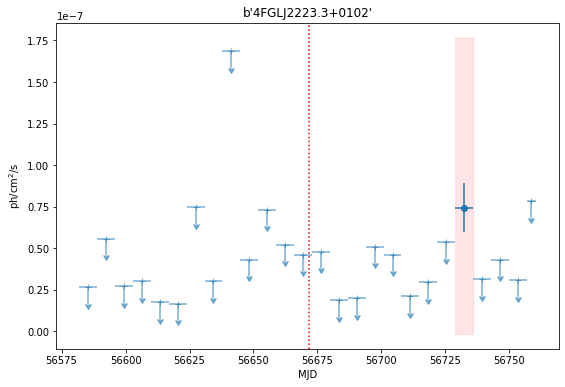

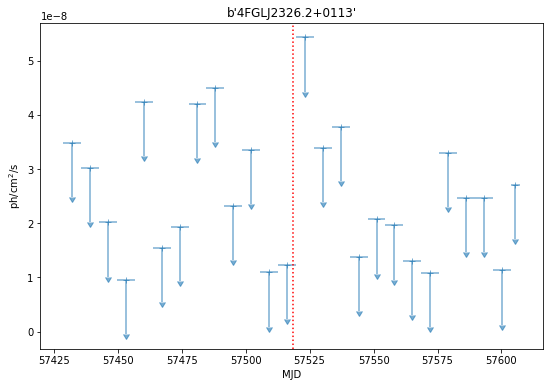

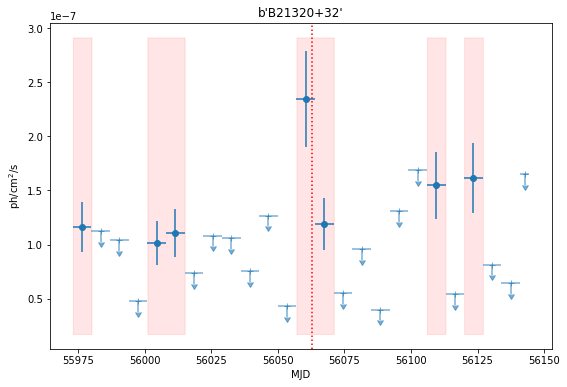

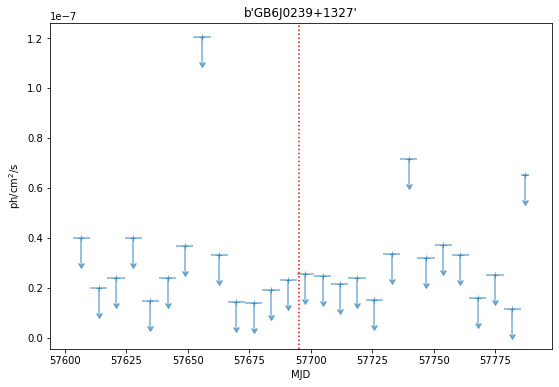

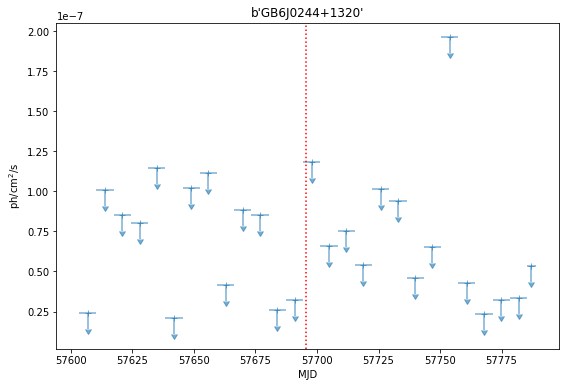

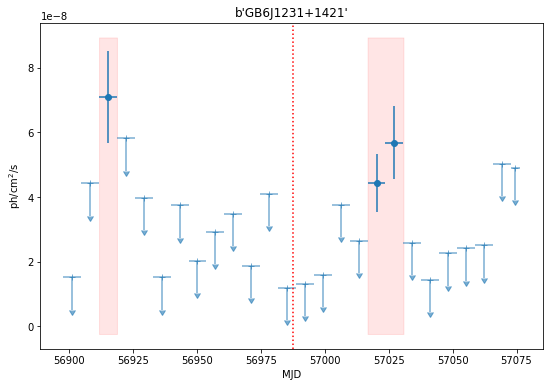

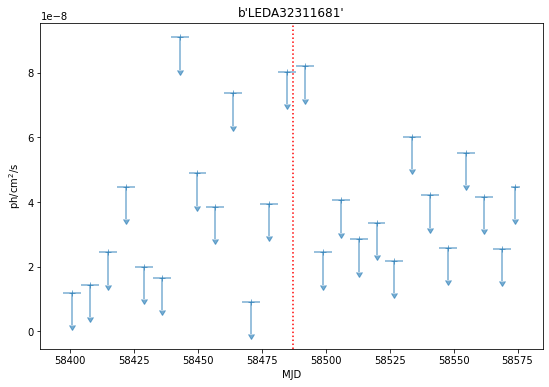

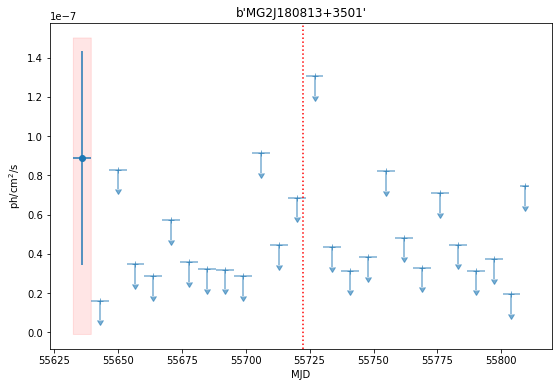

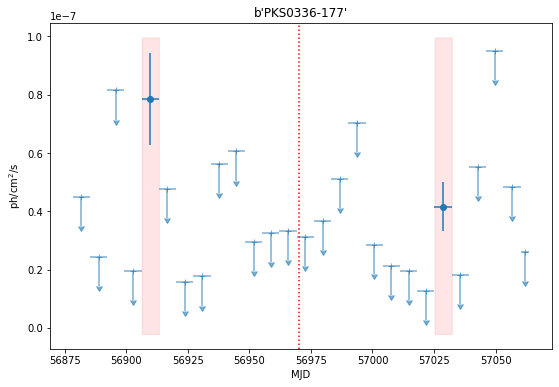

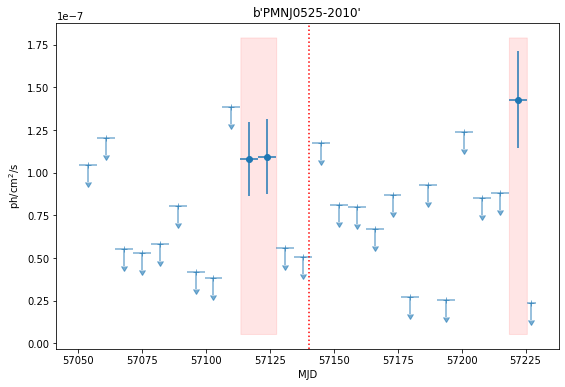

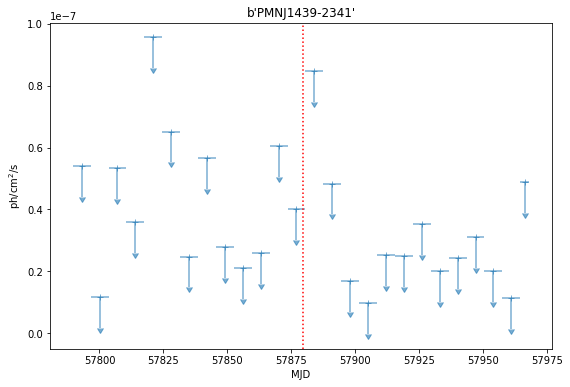

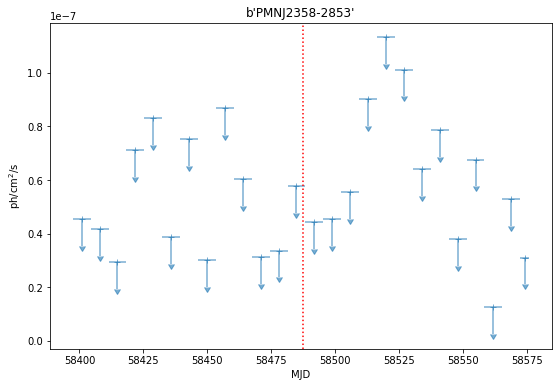

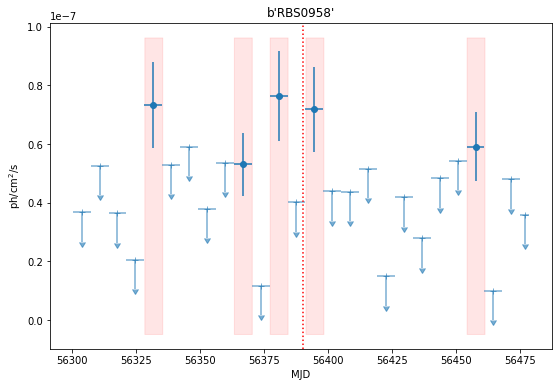

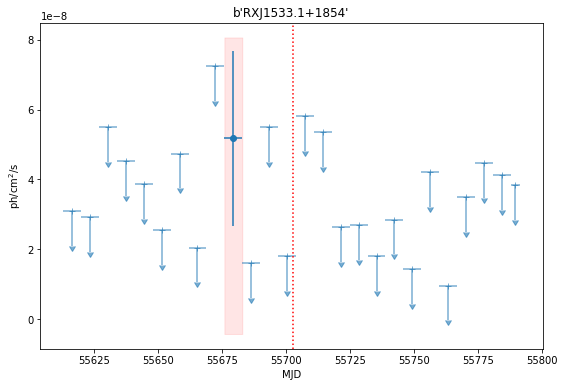

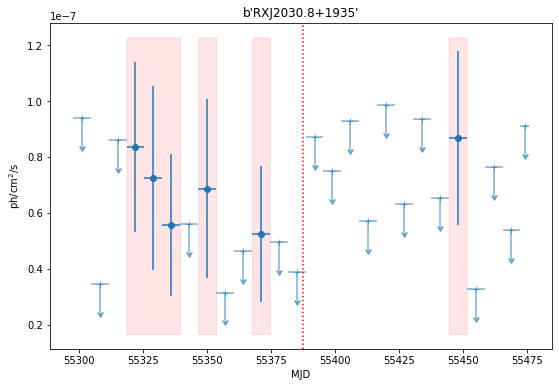

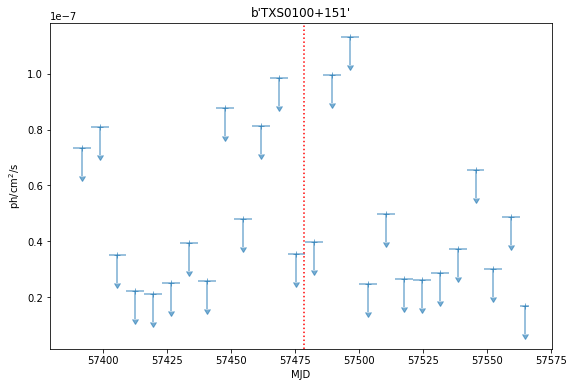

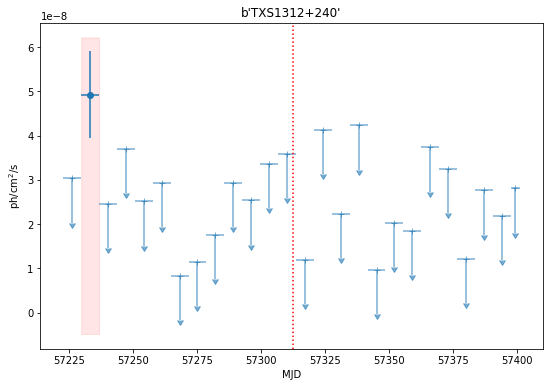

In [13]:
for i, lc in enumerate(lightcurves):
    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    ax = plotting.plot_lightcurve(ax, lc)
    ax.axvline(nu_t["time"][i], ls=':', color='red')
    #fig.savefig(f"./plots/{lc.name}_4thr.png")

In [ ]:
fig, ax = plt.subplots(len(lightcurves), 1, figsize=(9,len(lightcurves)*6))

for i, lc in enumerate(lightcurves):
    ax[i] = plotting.plot_lightcurve(ax[i], lc)
    ax[i].axvline(nu_t["time"][i], ls=':', color='red')

In [14]:
flaring_probs = np.array([lc.flare_probability for lc in lightcurves]).flatten()

In [15]:
np.mean(flaring_probs)*36

2.361185983827493

In [16]:
coincidences = np.array([lc(np.array([nu_t["time"][i]])) for i,lc in enumerate(lightcurves)]).flatten()

In [17]:
n_coinc = np.sum(coincidences)
print(n_coinc)

4


In [69]:
bkg_tr = func.background_trials(10000000, lightcurves)

100%|██████████| 10000000/10000000 [7:15:18<00:00, 382.88it/s]  


In [70]:
np.save("./trials/bkg_trials.npy", bkg_tr)

In [18]:
bkg_tr = np.load("./trials/bkg_trials.npy")

In [71]:
mu = np.mean(bkg_tr)
print(mu)

2.3614425


In [72]:
pval = np.sum(bkg_tr>=n_coinc)/len(bkg_tr)
print(pval)

0.1938076


In [ ]:
#sig_tr = []
#for i in range(len(lightcurves)):
#    sig_tr.append(func.signal_trials(100000,i,lightcurves,seed=i))
#sig_tr = np.array(sig_tr)

In [ ]:
#np.save("./trials/sig_trials_4thr.npy", sig_tr)

In [21]:
sig_tr = np.load("./trials/sig_trials.npy")

In [22]:
mu_s = np.mean(sig_tr, axis=1)
print(mu_s)

[ 2.35621  3.28916  4.23266  5.16721  6.09612  7.05676  7.96234  8.88596
  9.83554 10.79396 11.69127 12.65008 13.56963 14.51638 15.44335 16.39417
 17.31152 18.23976 19.18097 20.09227 21.04566 21.97781 22.9235  23.8437
 24.7617  25.68182 26.58901 27.50783 28.37408 29.19358 30.01272 30.77741
 31.49984 32.1505  32.74942 33.28317]


In [23]:
n_sources_bins = np.linspace(-0.5,len(lightcurves)+0.5,len(lightcurves)+2)
print(n_sources_bins)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5]


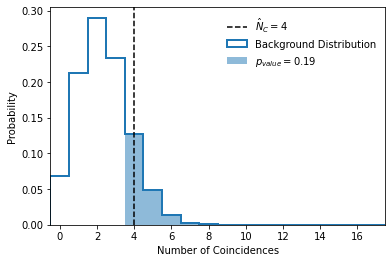

In [52]:
fig, ax = plt.subplots()
color = next(ax._get_lines.prop_cycler)["color"]

high_tr = bkg_tr[bkg_tr >= n_coinc]
w = np.ones_like(high_tr) / len(bkg_tr)

ax.hist(
    bkg_tr,
    bins=n_sources_bins,
    histtype="step",
    lw=2,
    color=color,
    density=True,
    label="Background Distribution",
)

ax.axvline(n_coinc, color="black", ls="--", label=r"$\hat{N}_{C} = 4$")

ax.hist(
    high_tr,
    bins=n_sources_bins,
    weights=w,
    histtype="stepfilled",
    color=color,
    alpha=0.5,
    lw=2,
    density=False,
    label=r"$p_{value} = 0.19$",
)

ax.set_xlim([-0.5, 17.5])
ax.set_xlabel("Number of Coincidences")
ax.set_ylabel("Probability")
ax.legend(frameon=False)

#fig.savefig("./plots/background_distr_4thr.png")

In [53]:
val, _ = np.histogram(bkg_tr, bins=n_sources_bins, density=True)
cum_val = 1. - np.cumsum(val)

In [54]:
val_s = []
cumval_s = []
for tr in sig_tr:
    vals = np.histogram(tr, bins=n_sources_bins, density=True)[0]
    cum_vals = 1. - np.cumsum(vals)
    val_s.append(vals)
    cumval_s.append(cum_vals)

In [55]:
def prob(n, cum_vals):
    return(cum_vals[n])

In [56]:
pdf = np.array([val, *val_s])

In [57]:
pdf /= np.sum(pdf)

In [58]:
print(pdf)

[[0.00186792 0.00573573 0.00784678 ... 0.         0.         0.        ]
 [0.00186838 0.00573865 0.00787054 ... 0.         0.         0.        ]
 [0.00068892 0.00287378 0.0055073  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00195432 0.00184838 0.00884432]
 [0.         0.         0.         ... 0.00196297 0.00195811 0.01059514]
 [0.         0.         0.         ... 0.00192    0.00199459 0.01235054]]


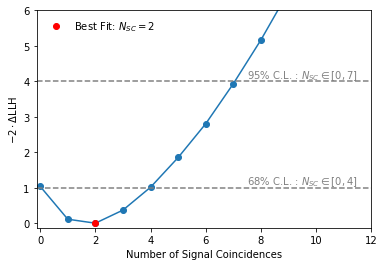

In [59]:
fig, ax = plt.subplots()
prof_lik = func.prof_likelihood(n_coinc,pdf)
ax.plot(range(len(prof_lik)), prof_lik, marker='o')
ax.plot(2, prof_lik[2], marker='o', label=r'Best Fit: $N_{SC}=2$', ls='', color='red')
#ax.axhline(1.282**2, ls='--', c='gray')
#ax.axhline(1.645**2, ls='--', c='gray')
ax.axhline(1**2, ls='--', c='gray')
ax.axhline(2**2, ls='--', c='gray')
#ax.axhline(3**2, ls='--', c='gray')
ax.set_xlim([-0.13,12.])
ax.set_ylim([-0.13,6])
ax.set_xlabel("Number of Signal Coincidences")
ax.set_ylabel(r"$-2 \cdot \Delta \mathrm{LLH}$")
ax.text(7.5,1.1, r"$68 \%$ C.L. : $N_{SC} \in [0, 4]$", color='gray')
ax.text(7.5,4.1, r"$95 \%$ C.L. : $N_{SC} \in [0, 7]$", color='gray')
ax.legend(frameon=False)
#fig.savefig("./plots/likelihood_ratio_4thr.png")

In [73]:
ts = []
ind = []
for n in bkg_tr:
    ts_i, ind_i = func.test_statistic(n,pdf)
    ts.append(ts_i)
    ind.append(ind_i)
ts = np.array(ts)
ind = np.array(ind)

../lib/functions.py:61: RuntimeWarning: divide by zero encountered in log
  return -2 * np.log(p_zero / p_h) if p_h != 0.0 else 0.0, ind


In [61]:
print(ts)

[4.91887476e-04 1.02097761e+00 1.02097761e+00 ... 1.01754322e-03
 1.01754322e-03 4.91887476e-04]


In [74]:
frac = np.sum(ts>=0.)/len(ts)

In [63]:
#ts = np.abs(ts) 

In [75]:
obs_ts, obs_ind = func.test_statistic(n_coinc,pdf)

In [76]:
np.sum(ts>=obs_ts)/len(ts)

0.1938076

In [77]:
np.sum(ind>=obs_ind)/len(ind)

0.1938076

(0.0, 10.0)

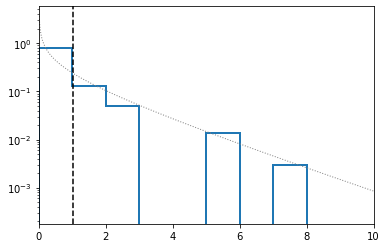

In [82]:
from scipy.stats import chi2

def chi_squared(x, ndof):
    return chi2.pdf(x, ndof)

fig, ax = plt.subplots()
tsbins = np.linspace(0.,10.,11)
ax.hist(ts,bins=tsbins, density=True, histtype='step', lw=2)

ax.axvline(obs_ts, color='black', ls='--')
x=np.linspace(0.,12,1000)

ax.plot(x, frac*chi_squared(x,1), ls=':', color='gray', lw=1, label='Chi2')

ax.semilogy()
ax.set_xlim([0.,10.])

In [68]:
chi2.sf(obs_ts,1)

0.31228722900771444

In [ ]:
from scipy.stats import norm

In [ ]:
norm.isf(2*1e-4 *0.85)